<a href="https://colab.research.google.com/github/Henrique-Peter/churn_prediction_project/blob/main/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Prediction

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

<p align=center>
<img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/churnrate.jpg" width="60%"></p>

Existem diversas práticas que ajudam a reduzir essa taxa, e a maioria delas está voltada para o investimento em uma boa equipe de *Customer Success*, além é claro, de boas práticas nas trocas de informações com uma equipe de dados. Profissionais de *Customer Success* têm o trabalho de se antecipar ao problema para poder reverter cancelamentos e manter os clientes com a empresa.

E é nesse momento que a tecnologia, e principalmente os algoritmos de Machine Learning, podem ter um papel fundamental. Levando em consideração que todos os tipos de dados que temos sobre os nossos clientes são uma maneira de conhecer melhor seus perfis, entendemos que um algoritmo capaz de juntar todos esses dados para prever um grau de satisfação ou até mesmo gerar insights para compreender as principais necessidades dessas pessoas, é fundamental para saber qual é o melhor tipo de abordagem para cada cliente.
<br>
<br>

### **O Caso da Netflix**

Quando falamos de *Churn*, o maior caso recente é o da própria Netflix, no qual recebemos a notícia oficial da empresa de que no primeiro trimestre de 2022, período em que a empresa esperava ter um aumento de 2.5 milhões de assinantes, segundo as análises de 2021, na verdade perdeu 200 mil assinantes.

<p align=center>
<img src="https://images.unsplash.com/photo-1574375927938-d5a98e8ffe85?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1469&q=80" width="60%"></p>

Além disso, através de uma reunião de resultados, a "revolucionária do streaming" relatou que está ainda mais pessimista em relação ao segundo trimestre deste ano, esperando uma perda de 2 milhões de assinantes.

A empresa apresentou os principais motivos para o resultado negativo, sendo eles a guerra entre Rússia e Ucrânia, a força do dólar e o aumento de preço da assinatura.

A verdade é que os responsáveis por esses assuntos dentro da Netflix não tinham como simplesmente adivinhar alguns fatores externos, como ocorrência de guerra ou variação exata de uma moeda, mas mesmo assim, com certeza foi feito um estudo para saber até onde o preço da assinatura poderia ser aumentado, sem perder uma grande base de clientes, fazendo com que as receitas do período fossem de acordo com o que os acionistas esperavam. Nesse caso, os imprevistos acabaram diminuindo a receita esperada, e fizeram as ações da empresa caírem.

Agora vamos seguir com o caso da nossa empresa exemplo para este projeto...

## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na plataforma de ensino da IBM Developer, e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [ ]:
!pip install scikit-plot -q
!pip install imbalanced-learn -q

In [ ]:
# importar warnings filter
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# tornar replicável
np.random.seed(33)

# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print(f'Linhas: {df.shape[0]}')
print(f'Colunas: {df.shape[1]}')

Linhas: 7043
Colunas: 21


Mesmo com uma breve visualização dos dados, já conseguimos perceber alguns detalhes:
* Conseguimos montar os perfis dos usuários com as variáveis presentes;
* Precisamos alterar muitas variáveis, passando de categóricas para numéricas;
* A *feature* `Churn` é a nossa variável alvo, que no momento se apresenta de forma categórica.

## Análise Exploratória dos Dados

Para conhecer melhor os dados com que estamos lidando, entender quais são as possíveis métricas que vão nos ajudar, e encontrar todos os problemas de fato, vamos fazer uma análise exploratória do dataset. 

De início, vou exibir na tela informações essenciais como a quantidade de dados ausentes, os nomes das colunas, os tipos de variáveis e os valores únicos por coluna.

In [ ]:
print(f'Dados ausentes (total): {df.isnull().sum().values.sum()}\n')
print(df.isnull().sum())
print(f'\nNomes das colunas:\n{df.columns.values}\n')
print(f'Tipos de variáveis:\n{df.dtypes}\n')
print(f'Valores únicos por coluna:\n{df.nunique()}')

Dados ausentes (total): 0

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Nomes das colunas:
['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']

Tipos de variáveis:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure   

Com essas novas informações, alguns detalhes ficaram mais claros:
* A coluna `customerID` poderá ser eliminada, pois o número de valores únicos dessa coluna é o valor total de linhas, logo, todos são clientes únicos, e essa identificação (neste caso) pode ser feita pelo próprio índice;
* `TotalCharges` deveria ser um `float`, mas está como `object`;
* O dataset está composto na sua maioria por variáveis binárias ou categóricas.

Primeiramente vamos eliminar a coluna `costumerID`, fazendo uma cópia do dataframe para podermos trabalhar nas alterações daqui em diante.

In [ ]:
# cópia do dataframe
df_clean = df.copy()

# eliminar customerID
df_clean.drop('customerID', axis = 1, inplace = True)

Em seguida vamos converter a coluna `TotalCharges` para float.

In [ ]:
# df.TotalCharges.astype('float32')

O que acontece quando tentamos converter essa coluna para `float` é que recebemos um erro como retorno, cuja descrição é que não foi possível converter `string` para `float`.

O que ocorreu na verdade é que as informações de que não tínhamos nenhum valor ausente no dataframe não estava correta. No caso da coluna em questão, supostamente os dados ausentes foram lançados como a string `""`. Quando tentamos realizar o processo `float("")`, ele retorna um erro.

Para resolver isso, vamos criar uma função que faça essa conversão, e depois poderemos identificar os dados ausentes de fato. Para eles, irei substituir o valor pela mediana da coluna.

In [ ]:
def converter_str_float(entrada):
    """
    Converte um objeto do tipo string em float.

    # Arguments
        entrada: string, string da coluna TotalCharges.

    # Returns
        Valor convertido em float, caso permita a conversão.
        NaN, caso o valor não seja apropriado.
    """

    try:
        return float(entrada)
    except ValueError:
        return np.nan

# converter as strings de TotalCharges para float
df_clean["TotalCharges"] = df_clean["TotalCharges"].apply(converter_str_float)

# verificar entradas ausentes
print(f'Dados ausentes em "TotalCharges": {df_clean.TotalCharges.isnull().sum()}\n')

# substituir os dados ausentes pelo valor da mediana
TotalChargesMedian = df_clean.TotalCharges.median()
df_clean["TotalCharges"].fillna(TotalChargesMedian, inplace=True)

Dados ausentes em "TotalCharges": 11



Outro passo fundamental é utilizar o método `describe`, que vai nos permitir ver se existe algum indício de outliers.

In [ ]:
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Como já foi dito antes, a maioria das colunas apresenta variáveis binárias e categóricas, e pela análise dos valores não identificamos nenhum grande outlier.

Para confirmar essa hipótese, vamos plotar os boxplots das colunas `MonthlyCharges` e `TotalCharges`, e ver que não é apresentado nenhum ponto além dos limites, que poderia ser considerado um outlier.

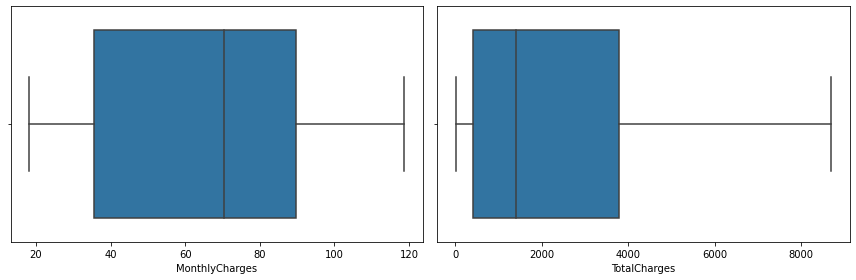

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
sns.boxplot(df_clean.MonthlyCharges, ax=ax[0])
sns.boxplot(df_clean.TotalCharges, ax=ax[1])
plt.tight_layout()

Seguindo a análise dos dados, vamos entender melhor o que a variável `tenure` representa neste caso.

Ao pesquisar pelo significado, chegamos à palavra "posse". Para o contexto do dataset em questão, seria relacionado ao tempo no qual um cliente já assina o serviço. Ou seja, é um indicativo de fidelidade.

Não temos nenhuma confirmação da unidade de tempo utilizada, por isso vou assumir que se trata de meses, levando em consideração os valores que visualizamos no `describe` anterior.

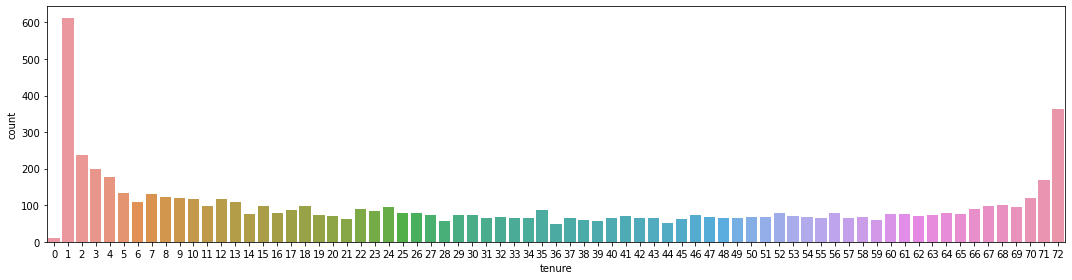

In [ ]:
fig, ax = plt.subplots(figsize = (15, 4))
sns.countplot(df.tenure)
plt.tight_layout()

Como foi verificado, estamos trabalhando com algumas variáveis categóricas. É importante visualizarmos seus valores únicos para sabermos se não existe mais de uma variável querendo representar a mesma coisa.

In [ ]:
# valores únicos das variáveis categóricas
np.unique(df_clean.select_dtypes('object').values)

array(['Bank transfer (automatic)', 'Credit card (automatic)', 'DSL',
       'Electronic check', 'Female', 'Fiber optic', 'Mailed check',
       'Male', 'Month-to-month', 'No', 'No internet service',
       'No phone service', 'One year', 'Two year', 'Yes'], dtype=object)

Analisando os valores, é compreensível que algumas pessoas interpretem que `No`, `No internet service` e `No phone service` representem a mesma coisa, mas eu vou considerar todos como variáveis únicas.

E para finalizar esta etapa, vamos verificar o balanceamento da variável alvo do projeto (`Churn`).

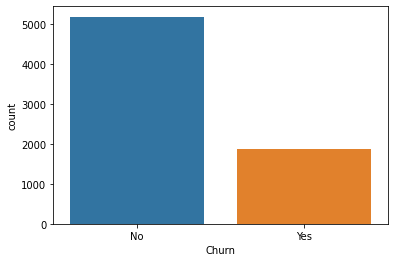

In [ ]:
sns.countplot(df.Churn)

Como podemos ver, existem muito mais ocorrências de valores em que não temos Churn. Isso torna o dataset desbalanceado, e tal informação será fundamental na hora de construir os modelos de Machine Learning (que serão modelos de aprendizado supervisionado, visto que serão treinados pelos dados que coletamos).

## Preparação dos Dados

Essa etapa é muito importante pois preparamos nossos dados de uma maneira em que eles poderão ser utilizados nos modelos de Machine Learning que iremos selecionar depois. 

Primeiramente vou separar os tipos de variáveis que tenho (binárias, numéricas e categóricas). As binárias serão processadas pelo `LabelEncoder`, o qual vai substituir os valores classificados como `object` para 0 e 1 (Isso inclui a variável alvo). Já as categóricas, serão transformadas em variáveis dummies, ou seja, os valores das colunas se tornam variáveis que terão valores 0 ou 1, sendo que 0 representa ausência ou negação da afirmação, e 1 a presença ou confirmação.

Dessa maneira consiguirei utilizar todas as variáveis nos modelos seguintes, sem nenhum problema.

In [ ]:
# separando variáveis
binary_var = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
num_var = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in binary_var]
cat_var = [col for col in df_clean.columns.tolist() if col not in binary_var + num_var]

# cópia do df
df_proc = df_clean.copy()

# Label Encoding para variáveis binárias
le = LabelEncoder()
for i in binary_var:
  df_proc[i] = le.fit_transform(df_proc[i])

# dummies para variáveis categóricas com mais de duas classes
df_proc = pd.get_dummies(df_proc, columns = cat_var)

# novo df
df_proc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


## Modelos de Machine Learning

Com as etapas anteriores de processamento, os dados já podem ser usados nos modelos de Machine Learning.

Neste primeiro momento não faremos nenhum ajuste mais sofisticado nos hiperparâmetros, assim como não iremos balancear os dados, fazer feature engineering ou feature selection. A primeira coisa será criar uma baseline para poder comparar o desempenho e a evolução dos modelos.

Além disso, é muito importante separar os dados para treino e teste (lembrando que os dados de teste são usados somente na última etapa, para obter uma avaliação mais real).

In [ ]:
# separação da variável alvo
X = df_proc.drop('Churn', axis = 1)
y = df_proc.Churn

# divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

Irei usar a cross-validation para estimar o erro da baseline e dos modelos iniciais. Para facilitar e melhorar o código, foi criada uma função `val_model`. A métrica utilizada para avaliação será `recall`, pois em previsões relacionadas a Churn Rate, os Positivos Verdadeiros (TP) são os dados mais importantes no momento de obter os resultados.

Para mais informações sobre a métrica de `recall`, clique [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score).

In [ ]:
def val_model(X, y, clf, quite=False):
    """
    Realiza cross-validation com os dados de treino para determinado modelo.

    # Arguments
        X: DataFrame, contém as variáveis independetes.
        y: Series, vetor contendo a variável alvo.
        clf: modelo classificador do Scikit-learn.
        quite: bool, indicando se a função deve imprimir os resultados ou não.

    # Returns
        float, média dos scores da cross-validation.
    """
    
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if quite == False:
        print(f'Recall: {scores.mean():.2f} (+/- {scores.std():.2f})')
    
    return scores.mean()

Para criar a baseline, vou usar os dados de treino no classificador Random Forest, sem alterar nada nos parâmetros.

In [ ]:
# desempenho da baseline
rfc = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rfc)

Recall: 0.49 (+/- 0.03)


Seguindo para as próximas etapas, como já havia sido dito, após termos a baseline irei fazer alguns ajustes para controlar a evolução do modelo, e buscar o melhor desempenho possível.

Primeiramente vou padronizar os dados, e depois fazer o balanceamento com a técnica de Under Sampling. Seguimos ajustando somente os dados de treino. 

In [ ]:
# padronização dos dados
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# balanceamento
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

Agora vou realizar a validação cruzada para alguns modelos diferentes, com intuito de identificar os melhores desempenhos. Segue a lista dos modelos selecionados:

* Random Forest
* Decision Tree
* Stochastic Gradient Descent
* SVC
* Regressão Logística
* XGBoost
* LightGBM

In [ ]:
# instanciando modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgd = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

model = []
recall = []

# desempenho (recall)
for clf in (rf, dt, sgd, svc, lr, xgb, lgbm):
  model.append(clf.__class__.__name__)
  recall.append(val_model(X_train_rus, y_train_rus, clf, quite=True))

pd.DataFrame(data = recall, index = model, columns = ['Recall'])

,Recall
RandomForestClassifier,0.760239
DecisionTreeClassifier,0.665229
SGDClassifier,0.704846
SVC,0.789058
LogisticRegression,0.796250
XGBClassifier,0.812807
LGBMClassifier,0.786185


Como podemos verificar, o XGBoost obteve o melhor resultado. Além disso, esse modelo nos permite realizar algumas otimizações nos parâmetros, o que vai melhorar a qualidade do classificador para as soluções.

Antes de otimizar o modelo selecionado, vou fazer algo que costuma ser parte da análise exploratória dos dados, mas como os valores só foram balanceados nessa etapa, preferi aguardar para plotar uma matriz de correlação para ver se identifico algum padrão ou semelhança nas variações das features.

Plotei uma matriz de correlação apenas com as features que mais se correlacionam com a variável alvo `Churn`.

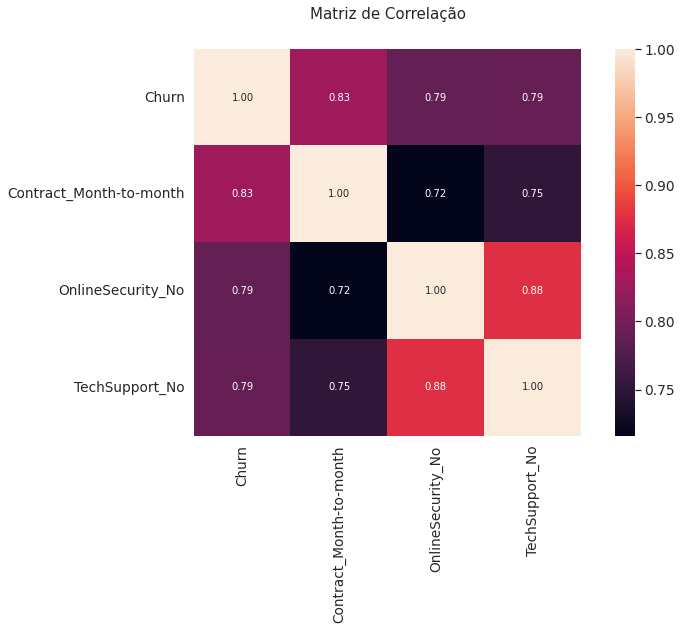

In [ ]:
df_corr = df_proc.corr()

# número de variáveis a serem selecionadas
k = 4

# encontrando as variáveis mais correlacionadas
cols = df_corr.nlargest(k, 'Churn').Churn.index
cm = np.corrcoef(df_corr[cols].values.T)

# plotando o heatmap
fig, ax = plt.subplots(figsize=(12, 9))
ax.set_title('Matriz de Correlação', pad = 30)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()

Pela análise da matriz acima, podemos perceber uma característica já esperada, que é a de maior ocorrência de cancelamentos por parte das pessoas que contratam os serviços por planos mensais. Isso acontece pois em caso de planos anuais, o pagamento é feito de forma antecipada ou é cobrada uma taxa em caso de cancelamento no meio do período contratado, o que não acontece em planos mensais, tornando o cancelamento muito mais comum.

A segunda maior relação está associada aos clientes que não possuem segurança de internet e suporte técnico, que acabam cancelando por não dependerem tanto de conexão com a internet, ou até mesmo não terem o conhecimento da importância desses serviços.

## Otimização de Hiperparâmetros

O modelo que selecionei (XGBoost) possui diversos parâmetros, sendo que alguns irão afetar, mais do que outros, a qualidade dos resultados. Vou seguir uma boa prática, que é definir uma taxa de aprendizado, o número de estimadores, realizar o tuning de alguns parâmetros, e por fim verificar outras taxas de aprendizado.

O modelo será instanciado com a taxa de aprendizado de 0.1.

In [ ]:
xgb = XGBClassifier(learning_rate=0.1)

# melhor número de estimadores
param_grid = {
 'n_estimators':range(0,1000,50),
}

# melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# resultados
print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8164060056302785 para {'n_estimators': 50}


Sabendo que o melhor número de estimadores é igual a 50, vou analisar os parâmetros `max_depth` e `min_child_weight`.

In [ ]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50)

param_grid = {
 'max_depth':range(1,8,1),
 'min_child_weight':range(1,5,1)
}

# melhores parâmetros
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# resultados
print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8185747054530289 para {'max_depth': 1, 'min_child_weight': 1}


O próximo passo será otimizar o parâmetro `gamma`.

In [ ]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50, max_depth=1, min_child_weight=1)

param_grid = {
 'gamma':[i/10.0 for i in range(0,5)]
}

# melhores parâmetros
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# resultados
print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.817146282973621 para {'gamma': 0.0}


Antes de apresentar o modelo final, com o valor de `gamma` sendo 0, vou testar qual o melhor valor para a taxa de aprendizado.

In [ ]:
xgb = XGBClassifier(n_estimators=50, max_depth=1, min_child_weight=1, gamma=0.0)

param_grid = {
 'learning_rate':[0.001, 0.01, 0.1, 1]
}

# melhores parâmetros
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# resultados
print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8927223438640391 para {'learning_rate': 0.001}


Para os valores testados, a menor taxa de aprendizado foi aquela capaz de melhorar o desempenho do modelo. Isso exigirá mais passos (`steps`) no processo de aprendizado do classificador, mas retornará um `score` melhor para a métrica de `recall`, que como foi citado antes, é a principal medida adotada para o projeto.

Agora vamos treinar o modelo final com o dataset de treino completo, para depois verificar o seu desempenho com os dados de teste, que permaneciam intactos até o momento.

              precision    recall  f1-score   support

           0       0.92      0.57      0.71      1281
           1       0.43      0.86      0.58       480

    accuracy                           0.65      1761
   macro avg       0.68      0.72      0.64      1761
weighted avg       0.79      0.65      0.67      1761

AUC: 0.7188



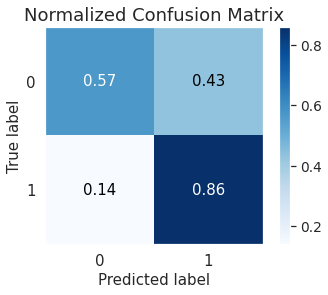

In [ ]:
# modelo final
xgb = XGBClassifier(learning_rate=0.001 , n_estimators=50, max_depth=1, min_child_weight=1, gamma=0.0)
xgb.fit(X_train_rus, y_train_rus)

# previsão com dados de teste
X_test = scaler.transform(X_test)
y_pred = xgb.predict(X_test)

# classification report
print(classification_report(y_test, y_pred))

# área sob a curva
print(f'AUC: {roc_auc_score(y_test, y_pred):.4f}\n')

# matriz de confusão
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

## Conclusão

O nosso modelo final conseguiu um resultado muito bom, visto que os hiperparâmetros e os dados em geral foram muito bem otimizados.

Importante perceber como algumas métricas aqui não são tão significativas como na previsão de fraudes, por exemplo, visto que falsos positivos, onde o cliente na verdade não estava pensando em cancelar mas mesmo assim o modelo identificou como potencial cancelamento, irão gerar talvez apenas um email para o cliente, e isso não vai significar um incômodo para a pessoa, que no máximo vai ignorar a mensagem.

E um dos tópicos mais importantes a serem compreendidos é o fato de que nem sempre os cancelamentos são simplesmente por questão de insatisfação, logo, é necessário conseguir medir a real porcentagem de clientes que precisam de maior atenção na hora de reverter uma situação como essa. Por isso a correlação entre as features é de extrema importância, pois dessa maneira é possível definir melhor o perfil dos clientes que desejamos contatar.